Notebook to explore the ocurrence per year of specific concepts connected with left and right ideology.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.utils import string_to_list as st
import scienceplots
plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])

In [3]:
# Read and adjust data.
df = pd.read_csv('../data/all-data-clean-tokenized.csv')

# Create year feature.
year = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.year
df['year'] = year

# Fix the problem with lists in pandas columns.
df['phrases'] = df['phrases'].apply(st)

# Filter out 2023.
df = df.loc[df['year'] < 2023]

In [56]:
def get_occurrence(terms: list, corpus: pd.DataFrame) -> pd.DataFrame:

    years = range(2000, 2023)
    occurrences = pd.DataFrame(index=years)
    total_interventions = corpus.loc[corpus['year'].isin(years)].groupby('year').count()

    for term in terms:
        mask = corpus.phrases.apply(lambda x: term in x)
        occurrence = corpus[mask].groupby(['year']).count()
        occurrence = occurrence['phrases'] / total_interventions['phrases'] * 100

        occurrence = occurrence.sort_index()
        occurrences[term] = occurrence

    return occurrences

def plot_occurrence(terms: list, occurrences: pd.DataFrame):
    fig, ax = plt.subplots()

    for term in terms:
        ax.plot(occurrences[term], label=term)

    ax.set_xticks(range(2000, 2023, 2))
    ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')
    ax.grid(alpha=.3)

    # remove tick marks
    ax.xaxis.set_tick_params(size=0)
    ax.yaxis.set_tick_params(size=0)

    # Titles
    ax.set_xlabel('Year')
    ax.set_ylabel(f'% of interventions including the term')
    ax.set_title('Occurrence of terms in the corpus')
    ax.title.set_weight('bold')

    ax.legend()

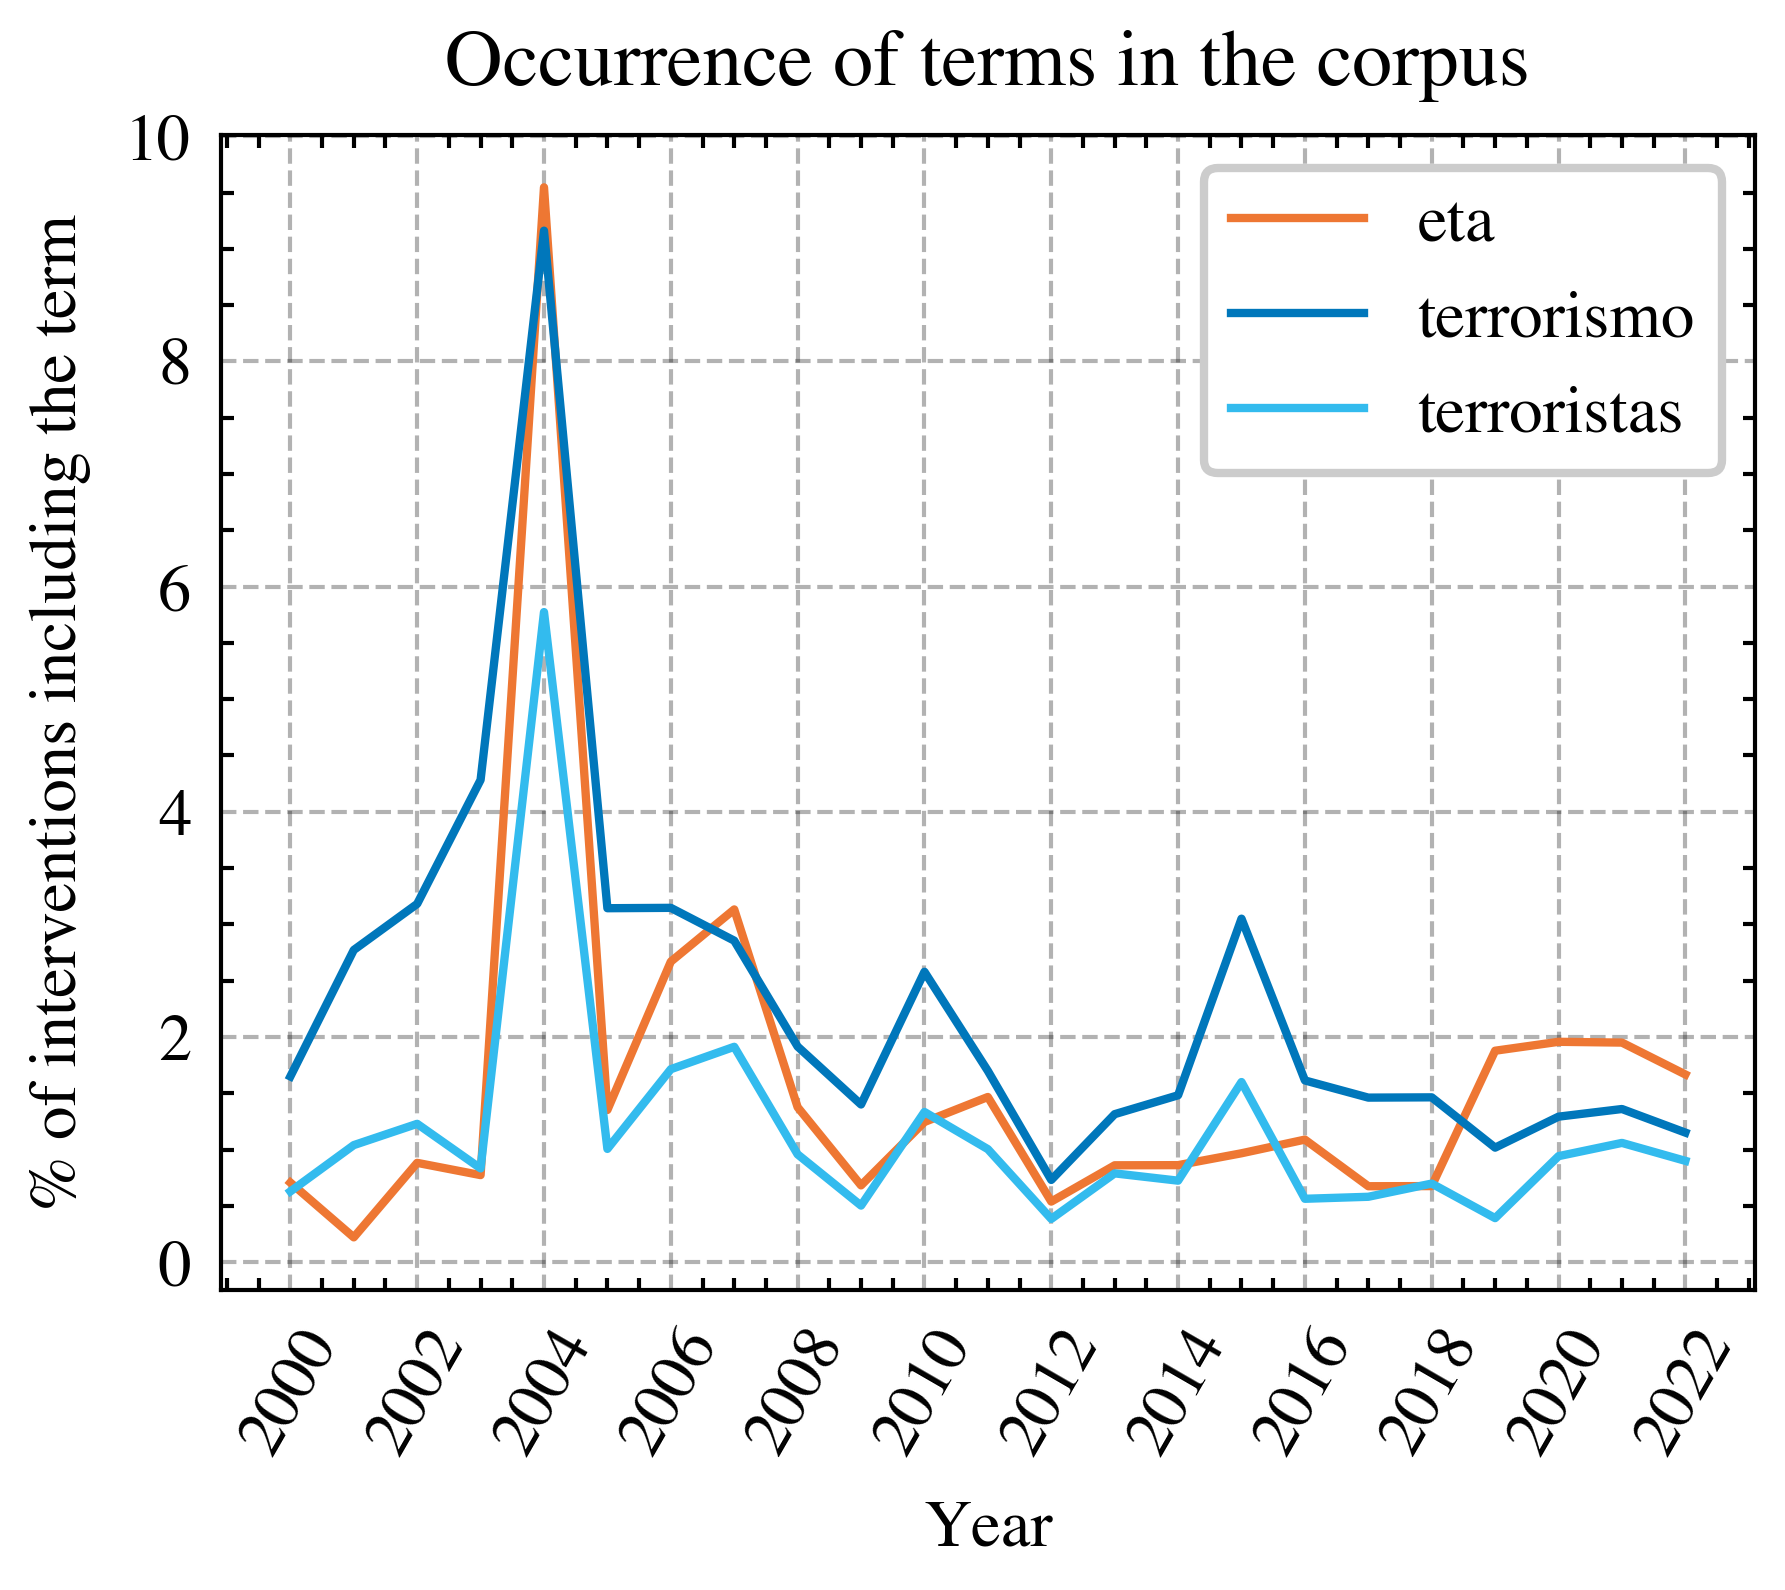

In [57]:
terms = ['eta', 'terrorismo', 'terroristas']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

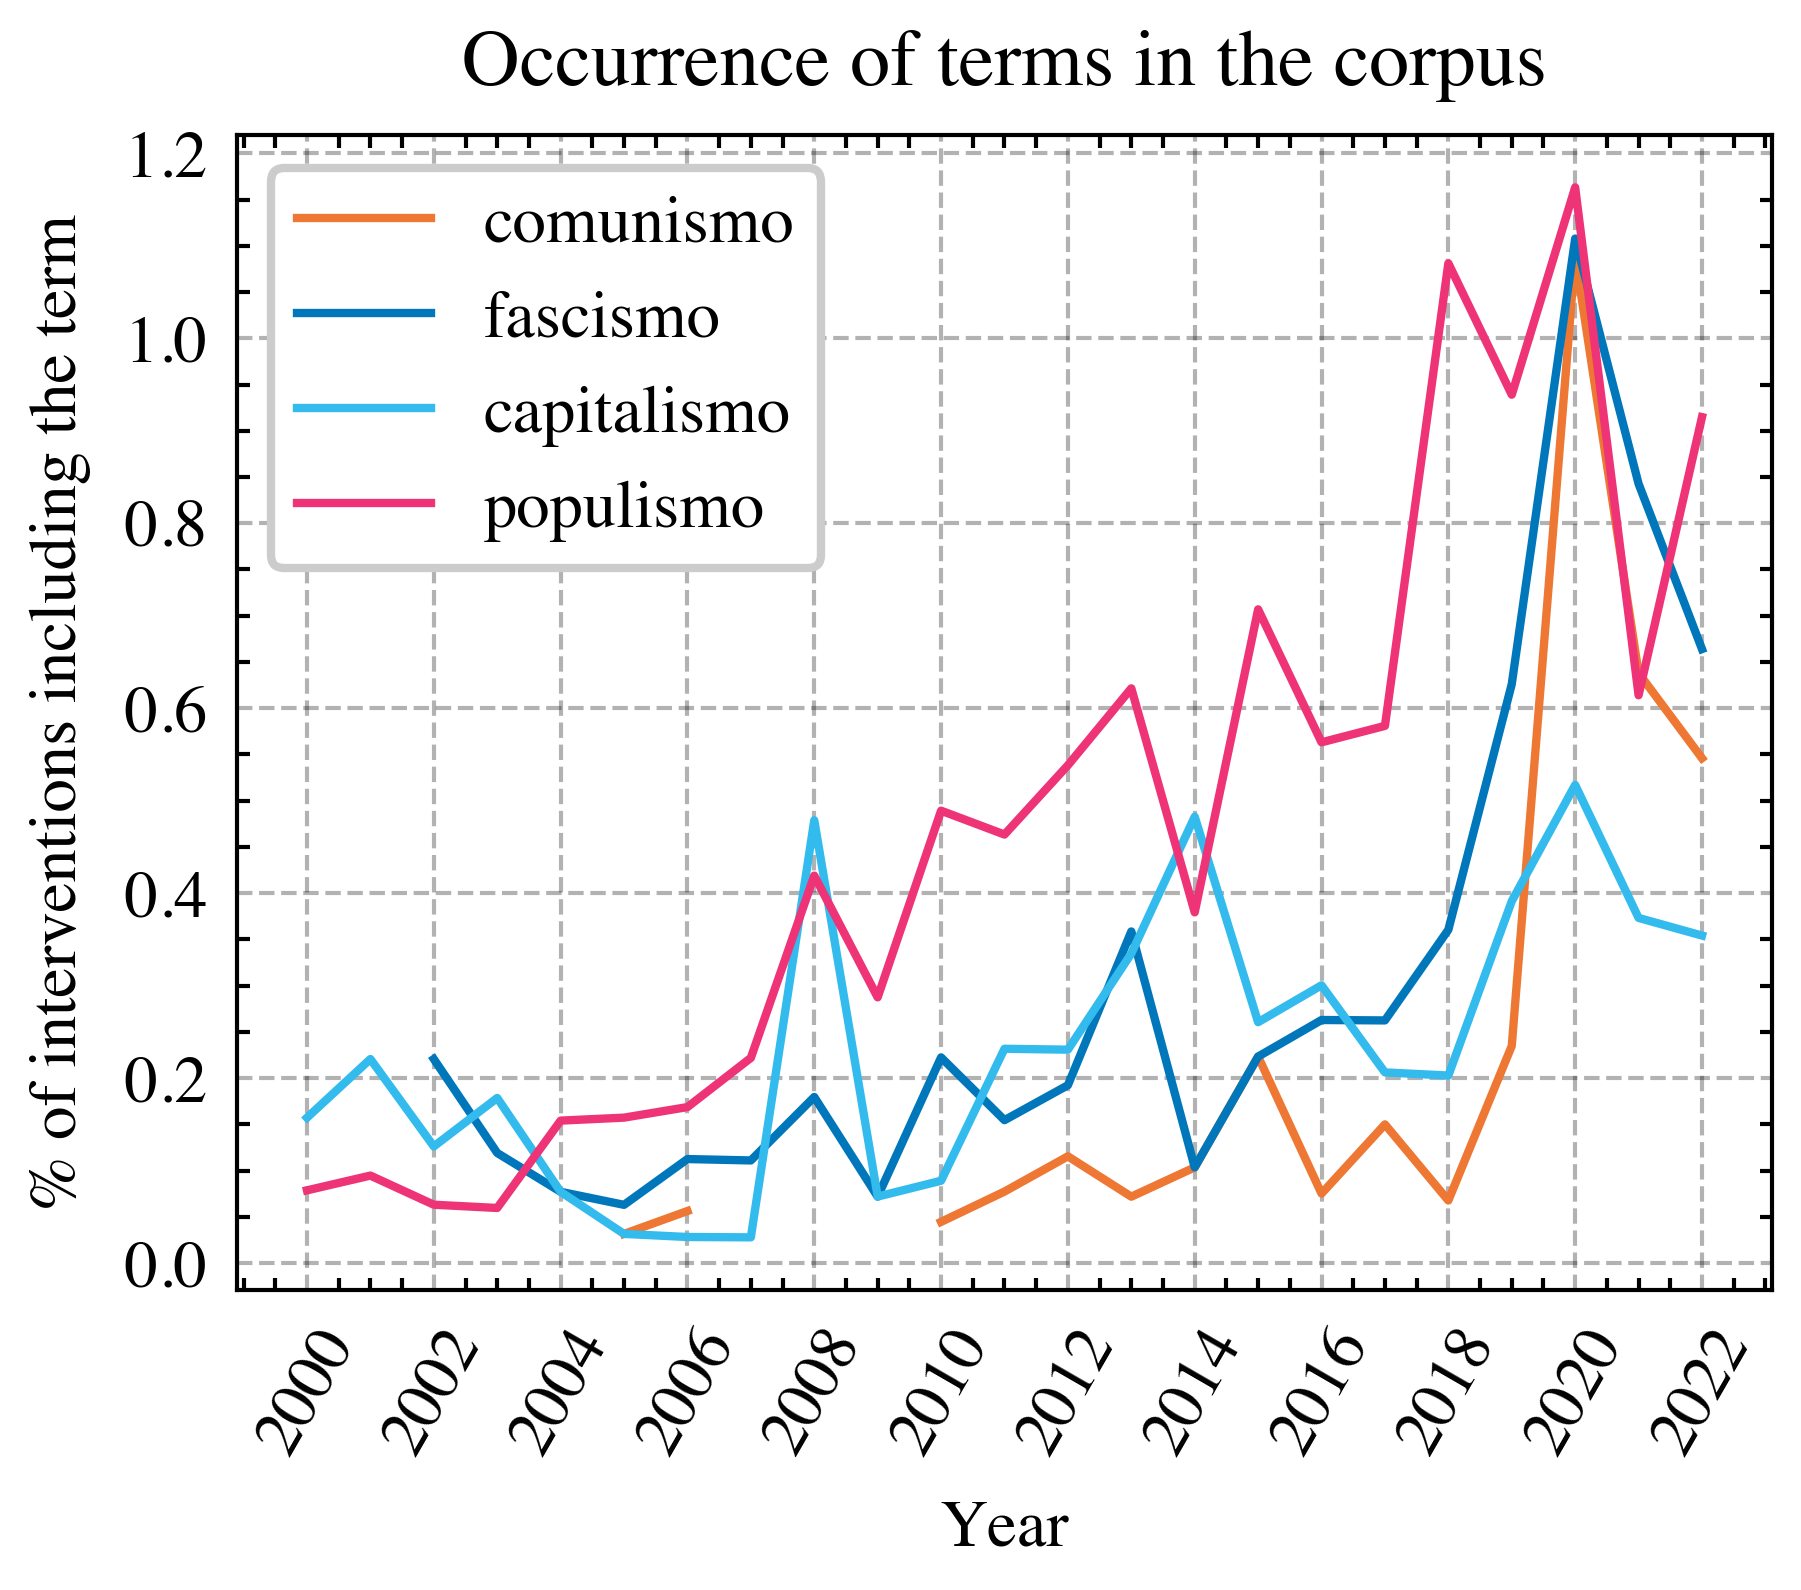

In [58]:
terms = ['comunismo', 'fascismo', 'capitalismo', 'populismo']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)


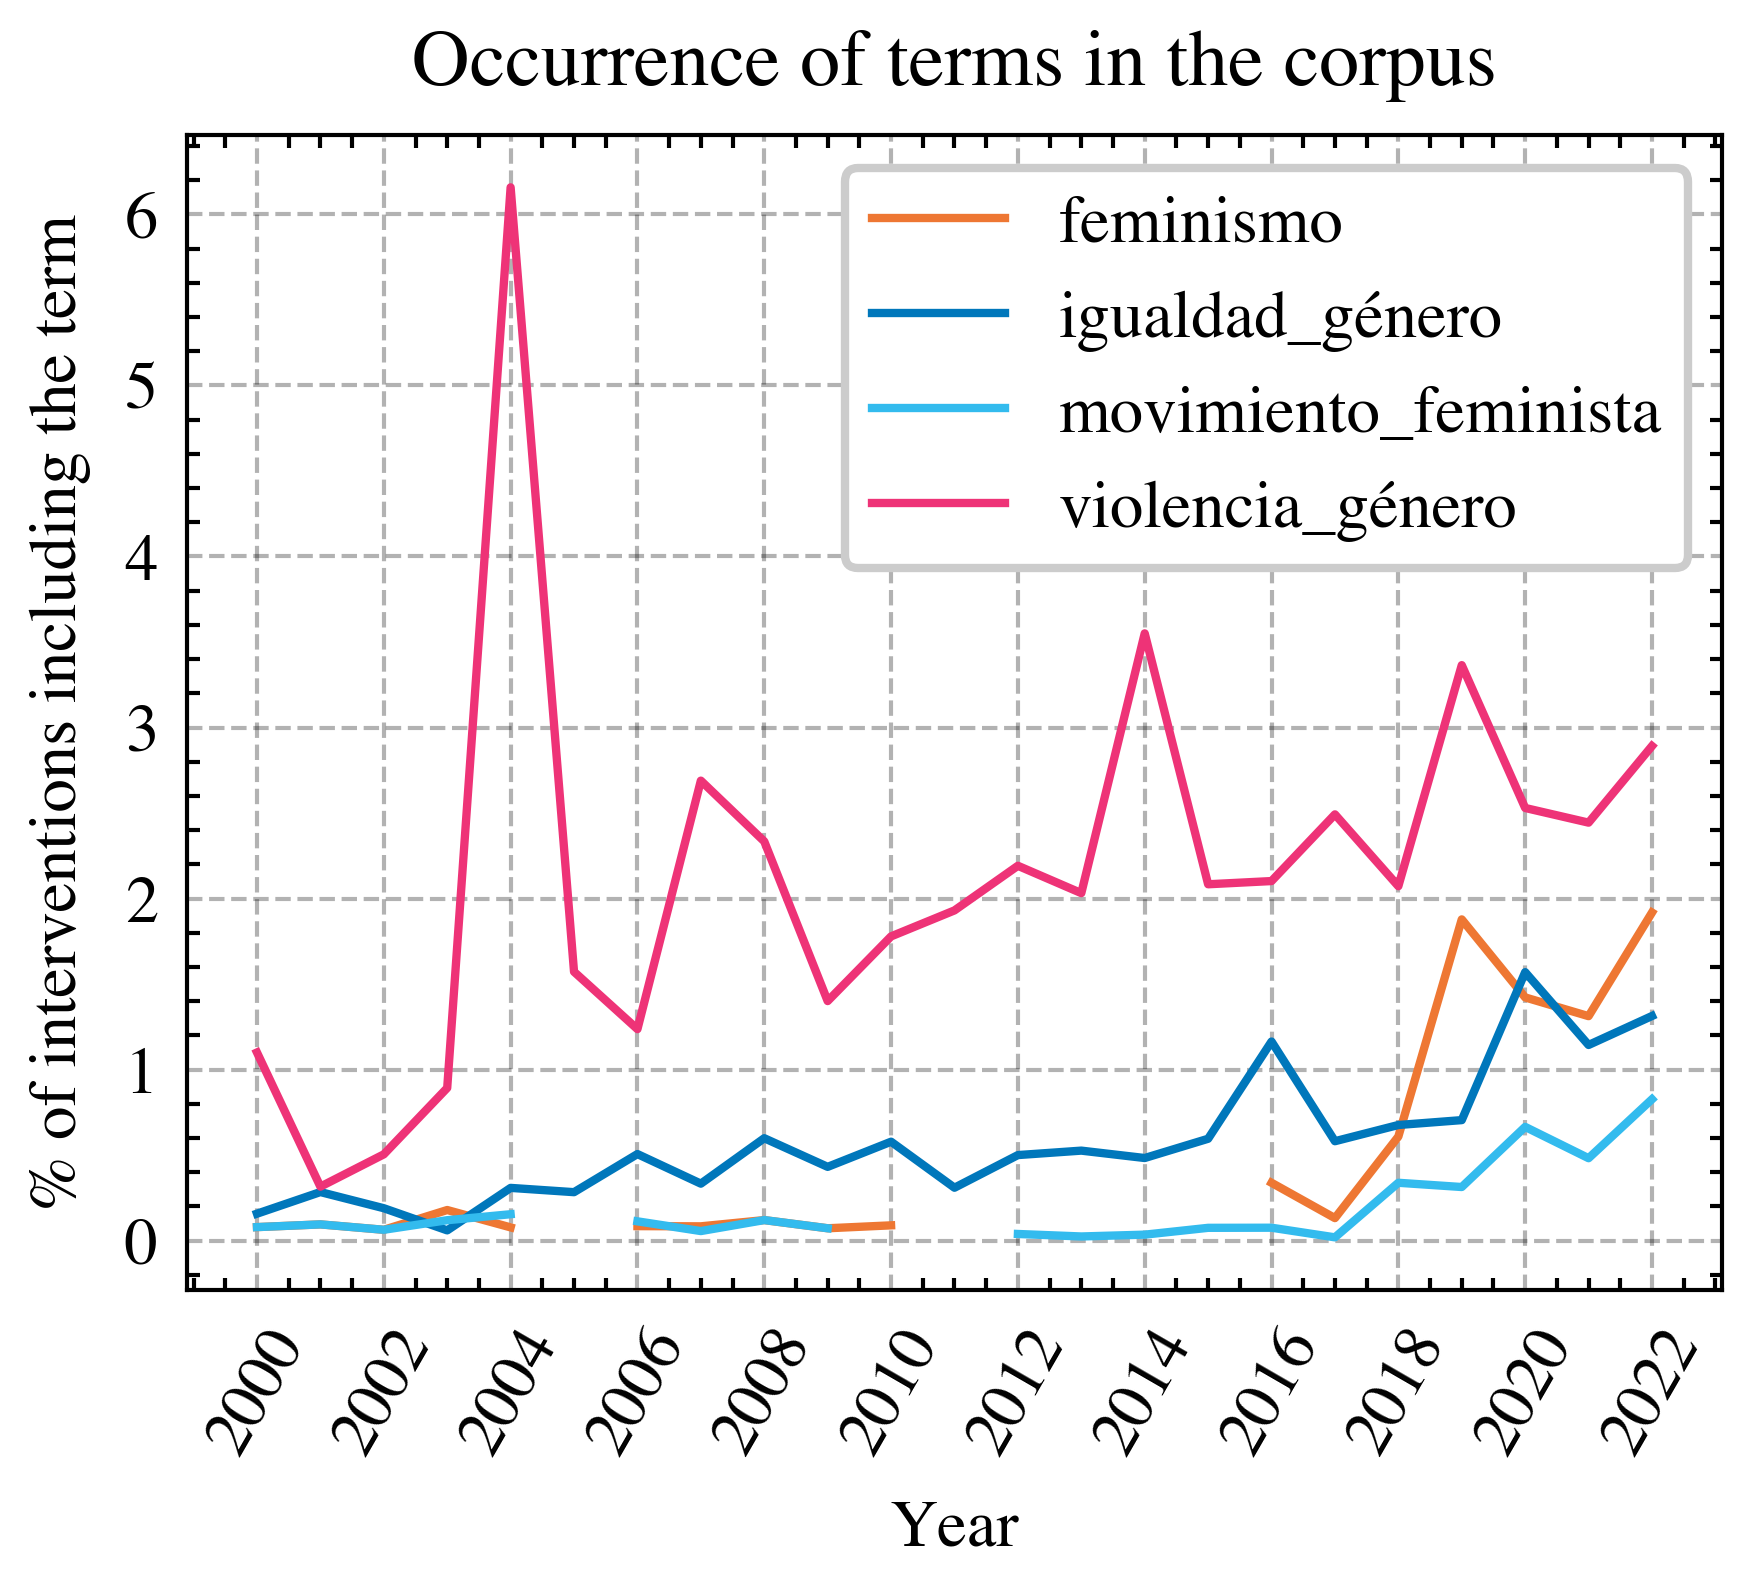

In [70]:
terms = ['feminismo', 'igualdad_género', 'movimiento_feminista', 'violencia_género']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

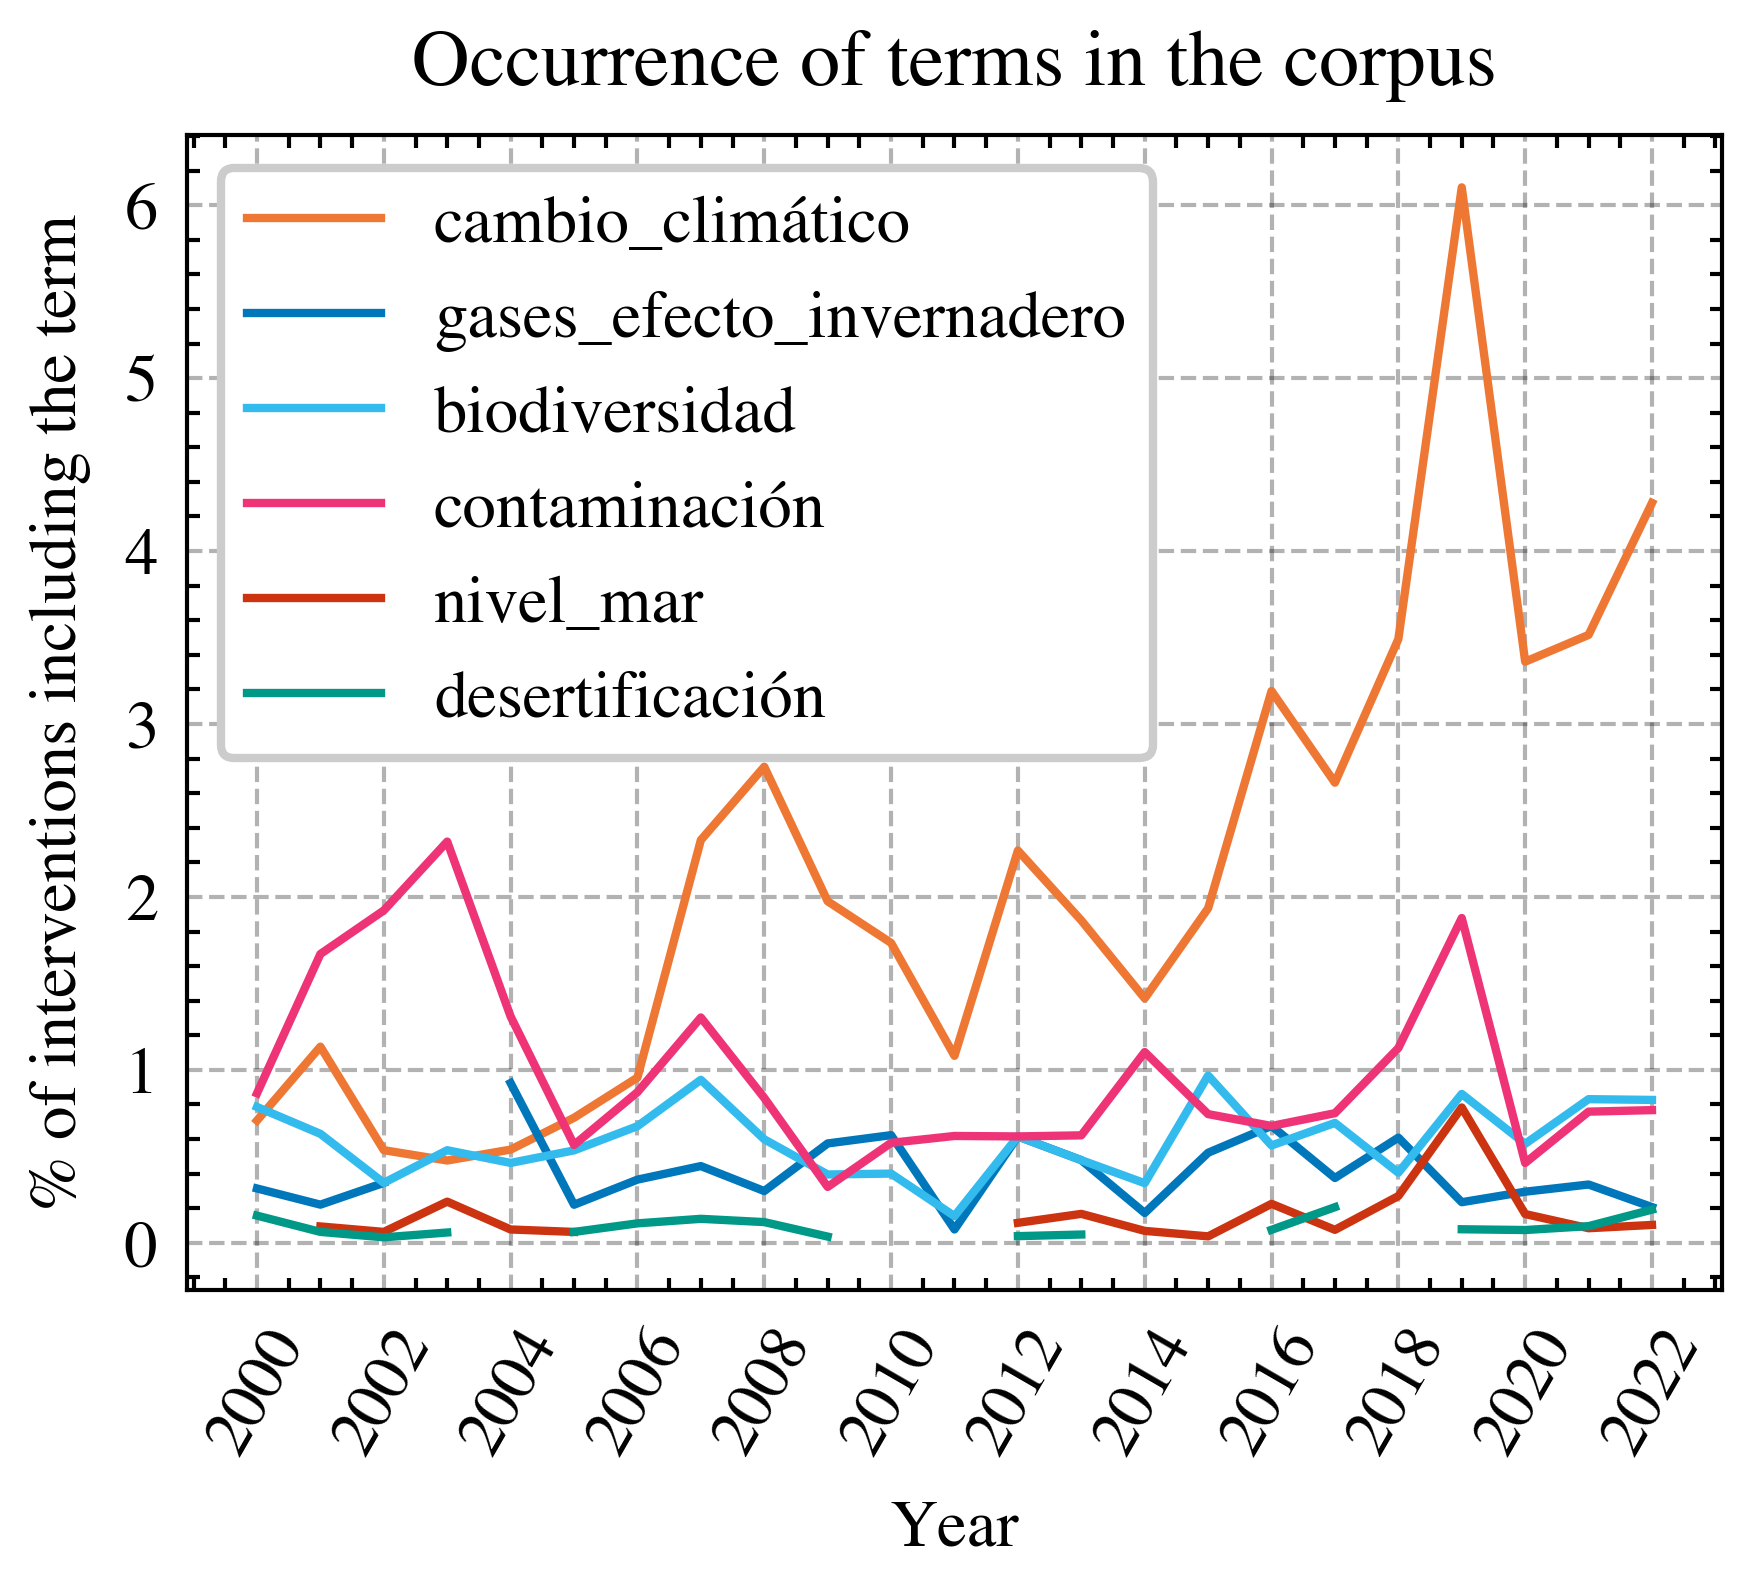

In [90]:
terms = ['cambio_climático', 'gases_efecto_invernadero', 'biodiversidad', 
         'contaminación', 'nivel_mar', 'desertificación']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)